In [87]:
import pandas as pd
import matplotlib.pyplot as plt
# Replace 'your_file.csv' with the actual file name
file_path1 = 'average_firing_rates.csv'
file_path2 = 'fi_curve_data.csv'
file_path3 = 'HH_fi_curve_data.csv'
file_path4 = 'ML_fi_curve_data.csv'
file_path5 = 'CS_fi_curve_data.csv'


# Read the CSV file into a DataFrame
dfE = pd.read_csv(file_path1)
dfE = dfE.iloc[:, :2]
dfAELI = pd.read_csv(file_path2)
dfHH = pd.read_csv(file_path3)
dfML = pd.read_csv(file_path4)
dfCS = pd.read_csv(file_path5)

# Display the DataFrame
print(dfE)
print(dfLI)
print(dfHH)
print(dfML)
print(dfCS)

    Current Amplitude (pA)  Average Firing Rate (Hz)
0                 0.000000                  0.000000
1                10.000000                  0.000000
2                20.000000                  0.000000
3                25.000000                  0.000000
4                29.999998                  0.332226
5                40.000000                  0.000000
6                50.000000                  0.000000
7                59.999996                  0.083056
8                70.000000                  0.124688
9                80.000000                  0.166113
10               90.000000                  0.166113
11              100.000000                  0.249377
12              110.000000                  0.166113
13              130.000000                  0.997506
14              140.000000                  0.332226
15              150.000000                  1.246883
16              160.000000                  0.166113
17              170.000000                  1.

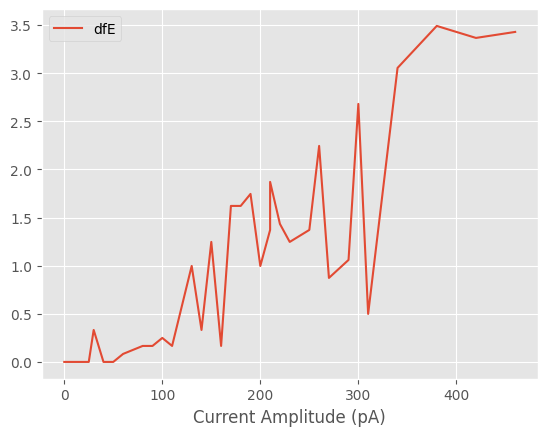

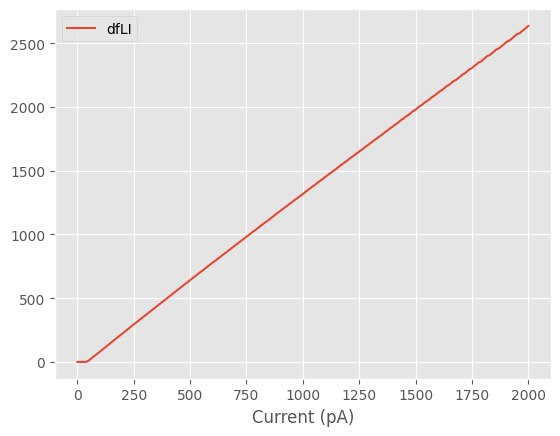

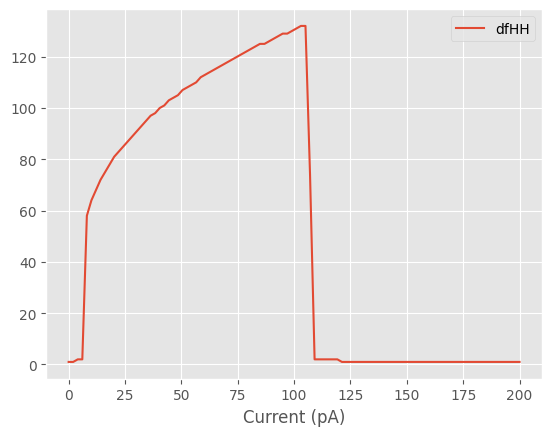

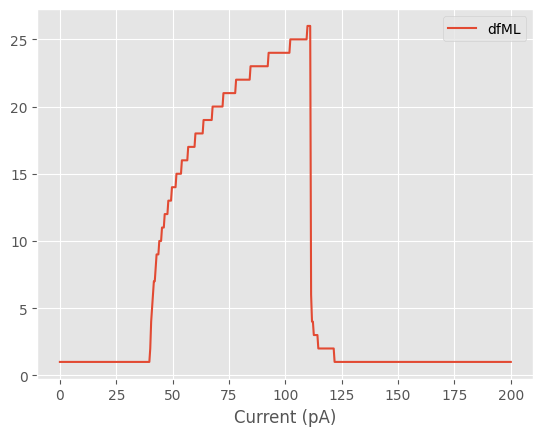

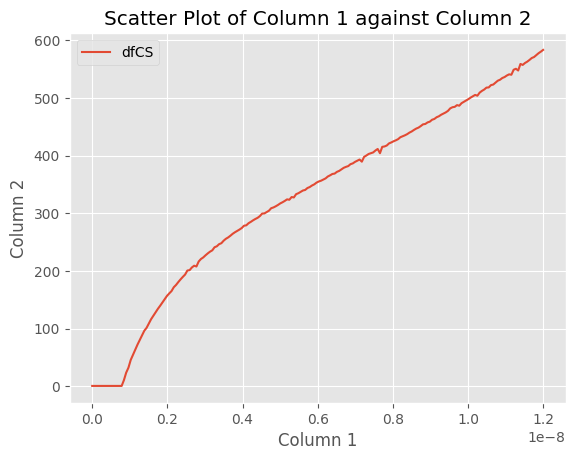

In [88]:
# Plot all DataFrames on the same plot

dfE.plot(x=dfE.columns[0], y=dfE.columns[1], label='dfE')
dfLI.plot(x=dfAELI.columns[0], y=dfLI.columns[1], label='dfLI')
dfHH.plot(x=dfHH.columns[0], y=dfHH.columns[1], label='dfHH')
dfML.plot(x=dfML.columns[0], y=dfML.columns[1], label='dfML')
dfCS.plot(x=dfCS.columns[0], y=dfCS.columns[1], label='dfCS')

plt.title('Scatter Plot of Column 1 against Column 2')
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.legend()  # Add legend to differentiate between DataFrames
plt.show()

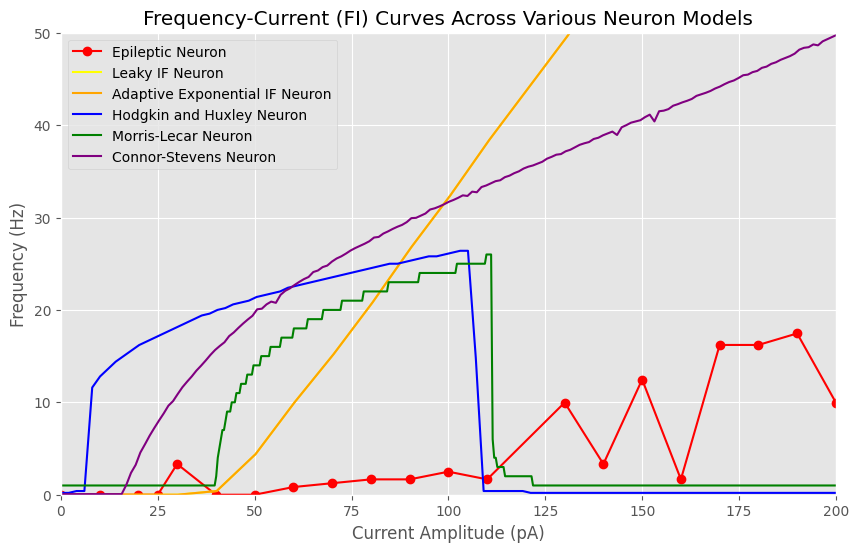

In [93]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))


plt.plot(dfE[dfE.columns[0]], dfE[dfE.columns[1]]*10, label='Epileptic Neuron',marker='o', color='red')
plt.plot(dfLI[dfAELI.columns[0]], dfLI[dfLI.columns[1]]*0.4, label='Leaky IF Neuron',color='yellow')
plt.plot(dfLI[dfAELI.columns[0]], dfLI[dfAELI.columns[1]]*0.4, label='Adaptive Exponential IF Neuron',color='orange')
plt.plot(dfHH[dfHH.columns[0]], dfHH[dfHH.columns[1]]*0.2, label='Hodgkin and Huxley Neuron',color='b')
plt.plot(dfML[dfML.columns[0]], dfML[dfML.columns[1]], label='Morris-Lecar Neuron',color='g')
plt.plot(dfCS[dfCS.columns[0]]*1e10*2, dfCS[dfCS.columns[1]]*1e-1, label='Connor-Stevens Neuron',color='purple')

plt.title('Frequency-Current (FI) Curves Across Various Neuron Models')
plt.xlabel('Current Amplitude (pA)')
plt.ylabel('Frequency (Hz)')
plt.legend()  
plt.grid(True)
plt.xlim([0,200])
plt.ylim([0,50])
plt.show()


AIC Values:
Epileptic Neuron: 124.32286028566125
Leaky-integrate Neuron: 545.0282435060657
Hodgkin and Huxley Neuron: 431.2761217707706
Morris-Lecar Neuron: 2213.5941328136455
Connor-Stevens Neuron: 459.02641691407166


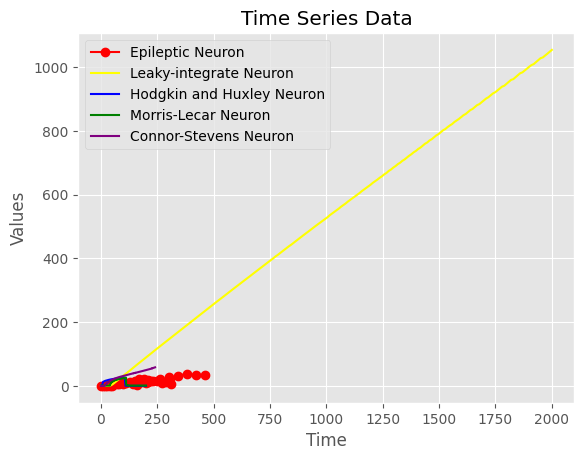

In [85]:
import numpy as np
import pandas as pd
from scipy.stats import linregress

# Assuming dfE, dfLI, dfHH, dfML, and dfCS are your DataFrames

# Function to calculate AIC
def calculate_aic(y, y_pred, num_params):
    n = len(y)
    resid = y - y_pred
    sse = np.sum(resid**2)
    aic = n * np.log(sse/n) + 2 * num_params
    return aic

# Fit linear regression model to each time series
def fit_linear_model(df):
    slope, intercept, r_value, p_value, std_err = linregress(df[df.columns[0]], df[df.columns[1]])
    y_pred = slope * df[df.columns[0]] + intercept
    aic = calculate_aic(df[df.columns[1]], y_pred, 2)  # 2 parameters for slope and intercept
    return aic

# Calculate AIC for each time series
aic_values = {
    'Epileptic Neuron': fit_linear_model(dfE * np.array([1, 10])),
    'Leaky-integrate Neuron': fit_linear_model(dfLI * np.array([1, 0.4])),
    'Hodgkin and Huxley Neuron': fit_linear_model(dfHH * np.array([1, 0.2])),
    'Morris-Lecar Neuron': fit_linear_model(dfML),
    'Connor-Stevens Neuron': fit_linear_model(dfCS * np.array([1e10 * 2, 1e-1]))
}

# Display AIC values
print("AIC Values:")
for model, aic in aic_values.items():
    print(f"{model}: {aic}")

# Plot the time series
plt.plot(dfE[dfE.columns[0]], dfE[dfE.columns[1]] * 10, label='Epileptic Neuron', marker='o', color='red')
plt.plot(dfLI[dfLI.columns[0]], dfLI[dfLI.columns[1]] * 0.4, label='Leaky-integrate Neuron', color='yellow')
plt.plot(dfHH[dfHH.columns[0]], dfHH[dfHH.columns[1]] * 0.2, label='Hodgkin and Huxley Neuron', color='b')
plt.plot(dfML[dfML.columns[0]], dfML[dfML.columns[1]], label='Morris-Lecar Neuron', color='g')
plt.plot(dfCS[dfCS.columns[0]] * 1e10 * 2, dfCS[dfCS.columns[1]] * 1e-1, label='Connor-Stevens Neuron', color='purple')
plt.legend()
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()

In [86]:
import numpy as np
import pandas as pd
from scipy.stats import linregress

# Assuming dfE, dfLI, dfHH, dfML, and dfCS are your DataFrames

# Function to calculate AIC
def calculate_aic(y, y_pred, num_params):
    n = len(y)
    resid = y - y_pred
    sse = np.sum(resid**2)
    aic = n * np.log(sse/n) + 2 * num_params
    return aic

# Fit linear regression model to each time series against the Epileptic Neuron data
def fit_linear_model(reference_df, comparison_df):
    slope, intercept, r_value, p_value, std_err = linregress(comparison_df[comparison_df.columns[0]], comparison_df[comparison_df.columns[1]])
    y_pred = slope * reference_df[reference_df.columns[0]] + intercept
    aic = calculate_aic(reference_df[reference_df.columns[1]], y_pred, 2)  # 2 parameters for slope and intercept
    return aic

# Calculate AIC for each model against the Epileptic Neuron data
reference_df = dfE * np.array([1, 10])  # Scaling for the Epileptic Neuron
comparison_dfs = [dfLI * np.array([1, 0.4]), dfHH * np.array([1, 0.2]), dfML, dfCS * np.array([1e10 * 2, 1e-1])]

aic_values = {}

for idx, comparison_df in enumerate(comparison_dfs):
    model_name = ['Leaky-integrate Neuron', 'Hodgkin and Huxley Neuron', 'Morris-Lecar Neuron', 'Connor-Stevens Neuron'][idx]
    aic_values[model_name] = fit_linear_model(reference_df, comparison_df)

# Display AIC values
print("AIC Values:")
for model, aic in aic_values.items():
    print(f"{model}: {aic}")


AIC Values:
Leaky-integrate Neuron: 317.7725720211821
Hodgkin and Huxley Neuron: 231.63578007902964
Morris-Lecar Neuron: 200.36930812813486
Connor-Stevens Neuron: 259.4551847696607
